In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import svm

In [2]:
df = pd.read_csv('/Users/dilinachathurakaperera/Code/personal/projects/Loan-Prediction-Machine-Learning/Dataset.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum() # checking missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

used transpose to make the columns rows and the rows columns to twist
the table

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


<Axes: >

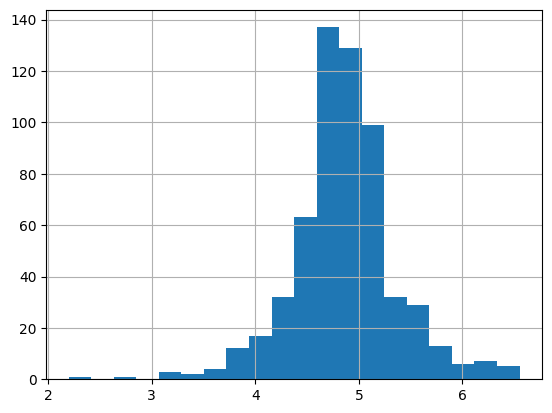

In [10]:

df['loanAmount_log'] = np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

np.log(df['LoanAmount'])
This applies the natural logarithm (log base e) to each value in the LoanAmount column using NumPy's log function.
Logarithms help to:
        - reduce the effect of large outliers
        - make the data more "normal" (less skewed), which is often better for modeling

In [11]:
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

In loanAmount_log there are 22 missing values

<Axes: >

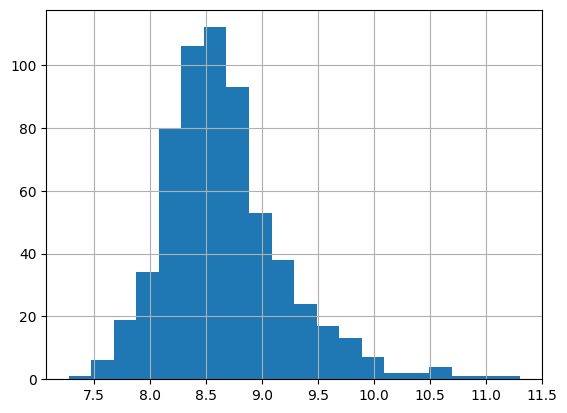

In [12]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df.isnull().sum()


/var/folders/kv/861zk_gn4dbfp63pdkry62dr0000gn/T/ipykernel_54141/1378105862.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/var/folders/kv/861zk_gn4dbfp63pdkry62dr0000gn/T/ipykernel_54141/1378105862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [14]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      shape=(614, 8), dtype=object)

In [15]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

using iloc method can easily retrieves any particular value from a row or column by using index values

the percentage of missing genders

In [16]:
print(" percentage of missing gender is %2f%%" % ((df['Gender'].isnull().sum()/df.shape[0])*100))

 percentage of missing gender is 0.000000%


Number of people who get the loan by gender

No of people take loan as group by gender: 
Gender
Male      502
Female    112
Name: count, dtype: int64


/var/folders/kv/861zk_gn4dbfp63pdkry62dr0000gn/T/ipykernel_54141/1713397910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df ,palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

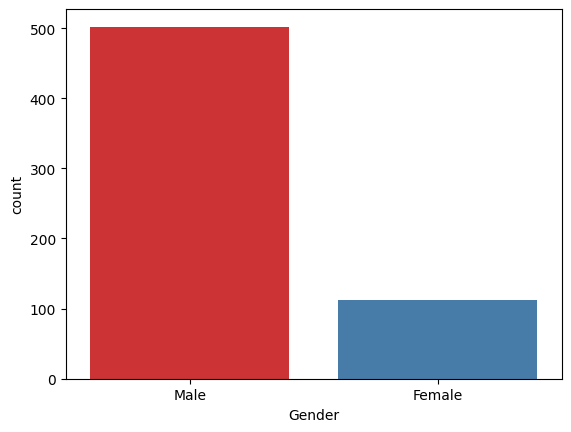

In [17]:
print('No of people take loan as group by gender: ')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df ,palette='Set1')

Number of people who get the loan by marital status

No of people take loan as group by marital status: 
Married
Yes    401
No     213
Name: count, dtype: int64


/var/folders/kv/861zk_gn4dbfp63pdkry62dr0000gn/T/ipykernel_54141/3594754811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=df ,palette='Set1')


<Axes: xlabel='Married', ylabel='count'>

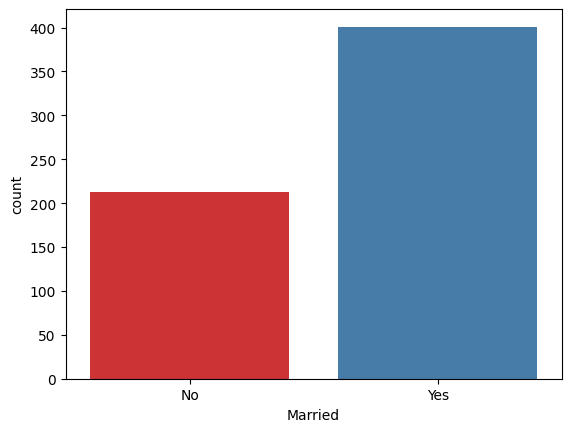

In [18]:
print('No of people take loan as group by marital status: ')
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df ,palette='Set1')

Number of people who get the loan by Dependents

/var/folders/kv/861zk_gn4dbfp63pdkry62dr0000gn/T/ipykernel_54141/948821257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents', data=df ,palette='Set1')


No of people take loan as group by Dependents: 
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

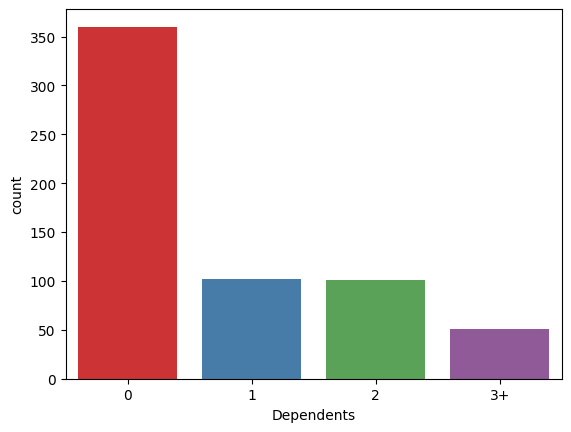

In [19]:
print('No of people take loan as group by Dependents: ')
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df ,palette='Set1')

Number of people who get the loan by Self_Employed

No of people take loan as group by Self_Employed: 
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


/var/folders/kv/861zk_gn4dbfp63pdkry62dr0000gn/T/ipykernel_54141/3512732296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=df ,palette='Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

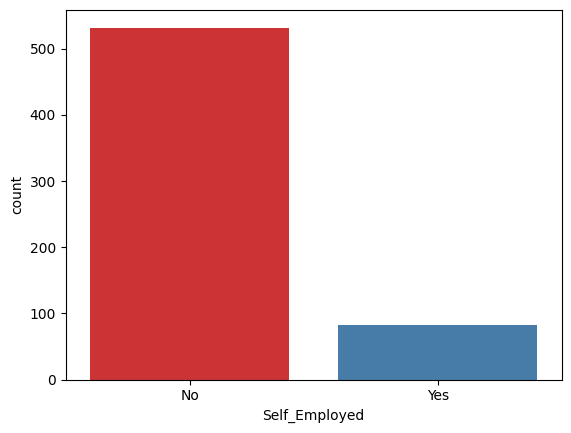

In [20]:
print('No of people take loan as group by Self_Employed: ')
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df ,palette='Set1')

Number of people who get the loan by LoanAmount

No of people take loan as group by LoanAmount: 
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


/var/folders/kv/861zk_gn4dbfp63pdkry62dr0000gn/T/ipykernel_54141/2154193412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount', data=df ,palette='Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

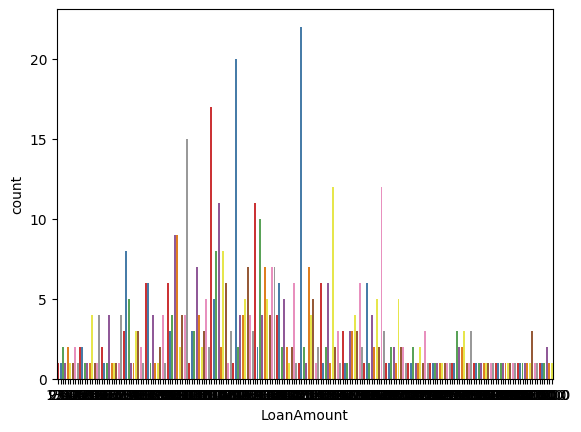

In [21]:
print('No of people take loan as group by LoanAmount: ')
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=df ,palette='Set1')

Number of people who get the loan by Credit_History

No of people take loan as group by Credit_History: 
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


/var/folders/kv/861zk_gn4dbfp63pdkry62dr0000gn/T/ipykernel_54141/728000721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=df ,palette='Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

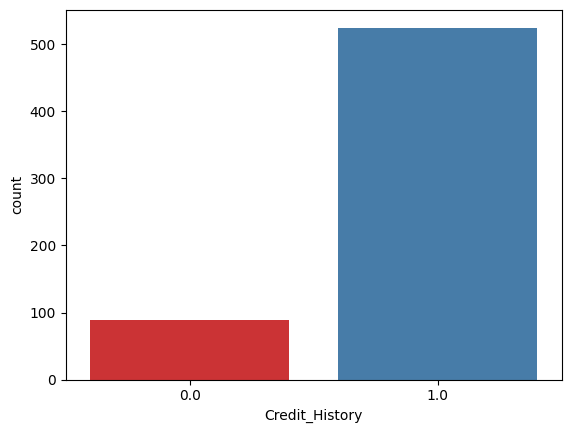

In [22]:
print('No of people take loan as group by Credit_History: ')
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df ,palette='Set1')

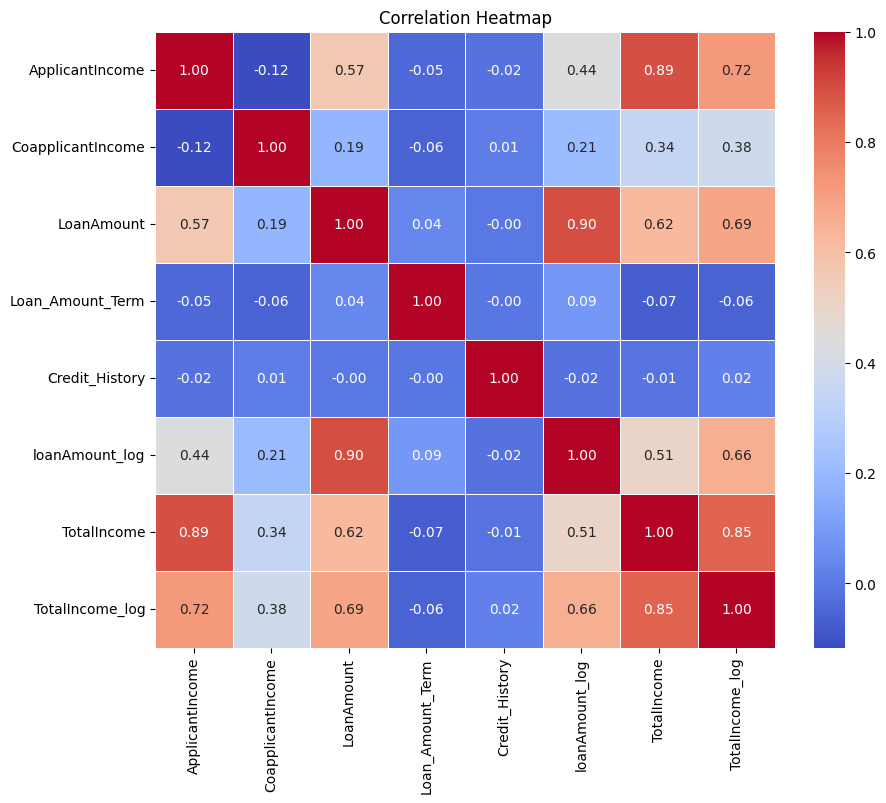

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=['number'])  

# Compute correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
##Total applicant Income
df['Total_Applicant']= df['ApplicantIncome'] +df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log,Total_Applicant
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,6000.0


/var/folders/kv/861zk_gn4dbfp63pdkry62dr0000gn/T/ipykernel_54141/1274151673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncomelog'])


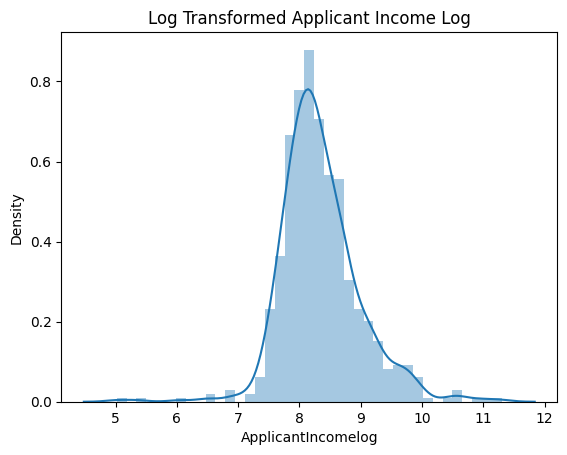

In [25]:
##Apply log transforamtion
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomelog'])
plt.title("Log Transformed Applicant Income Log")
plt.show()

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log,Total_Applicant,ApplicantIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,6000.0,8.699681


/var/folders/kv/861zk_gn4dbfp63pdkry62dr0000gn/T/ipykernel_54141/45555291.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmountlog'])


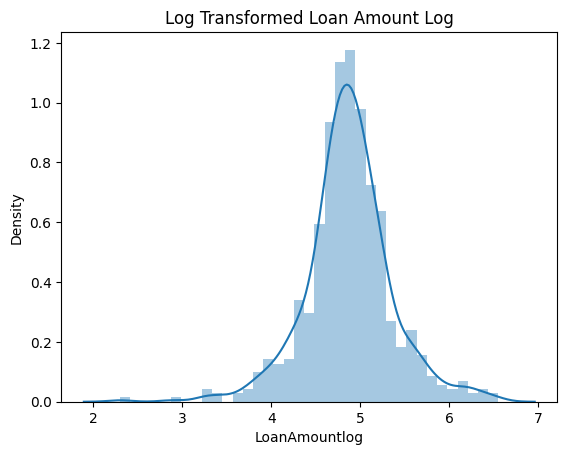

In [27]:
df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountlog'])
plt.title("Log Transformed")
plt.title("Log Transformed Loan Amount Log")
plt.show()

/var/folders/kv/861zk_gn4dbfp63pdkry62dr0000gn/T/ipykernel_54141/3925721216.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term_Log'])


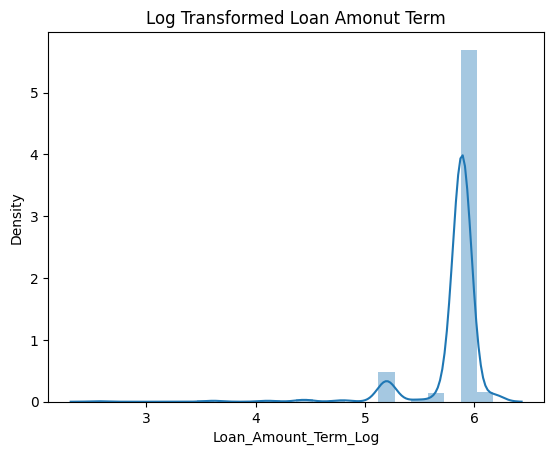

In [28]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_Log'])
plt.title("Log Transformed Loan Amonut Term")
plt.show()

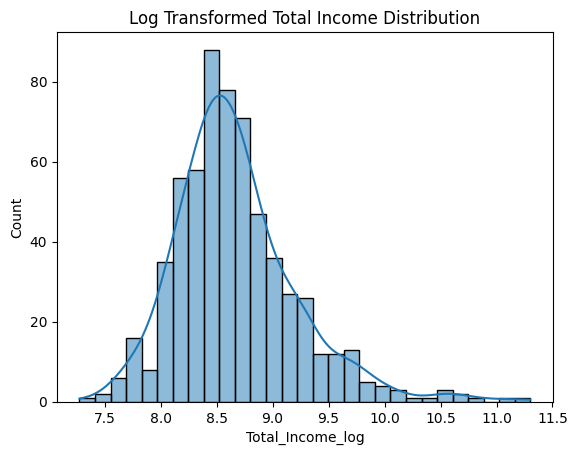

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you still have ApplicantIncome and CoapplicantIncome
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']  # Recalculate total income

# Apply log transformation to avoid skewness
df['Total_Income_log'] = np.log(df['Total_Income'] + 1)  # Add 1 to avoid log(0)

# Plot the distribution of log-transformed income
sns.histplot(df['Total_Income_log'], kde=True)
plt.title("Log Transformed Total Income Distribution")
plt.show()

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log,Total_Applicant,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_Log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,Y,4.857444,5849.0,8.674026,5849.0,8.674197,4.993232,5.888878,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,N,4.852030,6091.0,8.714568,6091.0,8.430327,4.859812,5.888878,6091.0,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,Y,4.189655,3000.0,8.006368,3000.0,8.006701,4.204693,5.888878,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,Y,4.787492,4941.0,8.505323,4941.0,7.857094,4.795791,5.888878,4941.0,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,Y,4.948760,6000.0,8.699515,6000.0,8.699681,4.955827,5.888878,6000.0,8.699681


In [31]:
##drop unncessary columns from above
cols = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log,Total_Applicant,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_Log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.857444,5849.0,8.674026,5849.0,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,6091.0,8.714568,6091.0,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,3000.0,8.006368,3000.0,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,4941.0,8.505323,4941.0,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,6000.0,8.699515,6000.0,8.699681,4.955827,5.888878,8.699681


In [32]:
##Encoding techniques: Label Encoding and One Hot encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log,Total_Applicant,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_Log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,4.857444,5849.0,8.674026,5849.0,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,4.852030,6091.0,8.714568,6091.0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,4.189655,3000.0,8.006368,3000.0,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,4.787492,4941.0,8.505323,4941.0,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,4.948760,6000.0,8.699515,6000.0,8.699681,4.955827,5.888878,8.699681


In [34]:
df.dtypes

Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
loanAmount_log          float64
TotalIncome             float64
TotalIncome_log         float64
Total_Applicant         float64
ApplicantIncomelog      float64
LoanAmountlog           float64
Loan_Amount_Term_Log    float64
Total_Income_log        float64
dtype: object

In [35]:
## Split Independents and Dependents features
x= df.drop(columns = ['Loan_Status'], axis =1)
y = df['Loan_Status']
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,loanAmount_log,TotalIncome,TotalIncome_log,Total_Applicant,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_Log,Total_Income_log
0,1,0,0,0,0,1.0,2,4.857444,5849.0,8.674026,5849.0,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,4.852030,6091.0,8.714568,6091.0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,4.189655,3000.0,8.006368,3000.0,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,4.787492,4941.0,8.505323,4941.0,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,4.948760,6000.0,8.699515,6000.0,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,4.262680,2900.0,7.972466,2900.0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,3.688879,4106.0,8.320205,4106.0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,5.533389,8312.0,9.025456,8312.0,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,5.231109,7583.0,8.933664,7583.0,8.933796,5.236442,5.888878,8.933796


In [36]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

Split the data set into train data set and testing data set 

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)
##Logistic Regression

model1= LogisticRegression()
model1.fit(x_train,y_train)
y_pred_model1 = model1.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model1)
accuracy*100

/Users/dilinachathurakaperera/Code/personal/projects/Loan-Prediction-Machine-Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


77.27272727272727

In [38]:
##Cross validation
score = cross_val_score(model1,x,y,cv=5)
score

/Users/dilinachathurakaperera/Code/personal/projects/Loan-Prediction-Machine-Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dilinachathurakaperera/Code/personal/projects/Loan-Prediction-Machine-Learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [39]:
np.mean(score)*100


np.float64(80.9462881514061)

In [40]:
## Decision Tree
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred_model2 = model2.predict(x_test)
accuracy = accuracy_score(y_pred_model2,y_test)
print("Accuracy score of Decision Tree model", accuracy*100)

Accuracy score of Decision Tree model 72.07792207792207


In [41]:
score = cross_val_score(model2,x,y,cv=5)
print("Cross validation for this", np.mean(score)*100)

Cross validation for this 72.14980674396908


In [42]:
##Random Classifier

model3= RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred_model3 = model3.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model3)
print("Accuracy score of Random Forest model", accuracy*100)

Accuracy score of Random Forest model 78.57142857142857


In [43]:
##KNeighbor model

model4= KNeighborsClassifier(n_neighbors=3)
model4.fit(x_train,y_train)
y_pred_model4 = model4.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model4)
print("Accuracy score of Kneighbor  model", accuracy*100)

Accuracy score of Kneighbor  model 59.09090909090909


In [44]:
score = cross_val_score(model3,x,y,cv=5)
print("Cross validation for this", np.mean(score)*100)

Cross validation for this 78.82846861255499


In [45]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name, y_test,y_pred):
    report = classification_report(y_test,y_pred)
    print(f"Classfication Report For{model_name}:\n{report}")
    
generate_classification_report(model1,y_test,y_pred_model1)  
generate_classification_report(model2,y_test,y_pred_model2)  
generate_classification_report(model3,y_test,y_pred_model3)  
generate_classification_report(model4,y_test,y_pred_model4)  

Classfication Report ForLogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154

Classfication Report ForDecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.62      0.52      0.57        54
           1       0.76      0.83      0.79       100

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154

Classfication Report ForRandomForestClassifier():
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        54
           1       0.78      0.94      0.85       100

    accuracy                        

In [46]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd


df = pd.read_csv('/Users/dilinachathurakaperera/Code/personal/projects/Loan-Prediction-Machine-Learning/train.csv')  

# Define x and y
x = df.drop('Loan_Status', axis=1)  # Features
y = df['Loan_Status']               # Target

# Apply Random Oversampling
oversample = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversample.fit_resample(x, y)

# Create a DataFrame from the resampled data
df_resampled = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.Series(y_resampled, name="Loan_Status")], axis=1)
x_resampled

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
839,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban
840,LP002898,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural
841,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural
842,LP002288,Male,Yes,2,Not Graduate,No,2889,0.0,45.0,180.0,0.0,Urban


In [49]:
y_resampled

0      Y
1      N
2      Y
3      Y
4      Y
      ..
839    N
840    N
841    N
842    N
843    N
Name: Loan_Status, Length: 844, dtype: object

In [50]:
# Drop Loan_ID since it's not useful for the model
x_resampled = x_resampled.drop(columns=['Loan_ID'], errors='ignore')

# Convert categorical columns to numeric
x_resampled = pd.get_dummies(x_resampled, drop_first=True)

# Convert all values to integers
x_resampled = x_resampled.fillna(0).astype(int)  # Fill NaN with 0 and convert to int

# Convert target labels to int
y_resampled = y_resampled.map({'Y': 1, 'N': 0}).astype(int)

# Check the result
print(x_resampled.dtypes)
print(y_resampled.dtypes)

ApplicantIncome            int64
CoapplicantIncome          int64
LoanAmount                 int64
Loan_Amount_Term           int64
Credit_History             int64
Gender_Male                int64
Married_Yes                int64
Dependents_1               int64
Dependents_2               int64
Dependents_3+              int64
Education_Not Graduate     int64
Self_Employed_Yes          int64
Property_Area_Semiurban    int64
Property_Area_Urban        int64
dtype: object
int64


In [51]:
x_resampled

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0,0,360,1,1,0,0,0,0,0,0,0,1
1,4583,1508,128,360,1,1,1,1,0,0,0,0,0,0
2,3000,0,66,360,1,1,1,0,0,0,0,1,0,1
3,2583,2358,120,360,1,1,1,0,0,0,1,0,0,1
4,6000,0,141,360,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,3992,0,0,180,1,1,1,0,0,1,1,0,0,1
840,1880,0,61,360,0,1,1,1,0,0,0,0,0,0
841,2787,1917,146,360,0,1,1,1,0,0,0,0,0,0
842,2889,0,45,180,0,1,1,0,1,0,1,0,0,1


In [52]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int64

In [53]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

# Split the resampled dataset into train and test sets
x_resampled_train, x_resampled_test, y_resampled_train, y_resampled_test = train_test_split(
    x_resampled, y_resampled, test_size=0.25, random_state=42
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Scale the data
scaler = StandardScaler()
x_resampled_train_scaled = scaler.fit_transform(x_resampled_train)
x_resampled_test_scaled = scaler.transform(x_resampled_test)

# Logistic Regression with scaled data
model1 = LogisticRegression()
model1.fit(x_resampled_train_scaled, y_resampled_train)
y_pred_model1 = model1.predict(x_resampled_test_scaled)

# Accuracy
accuracy = accuracy_score(y_resampled_test, y_pred_model1)
print("Logistic Regression Accuracy:", accuracy * 100)

Logistic Regression Accuracy: 69.19431279620854


In [55]:
from sklearn.tree import DecisionTreeClassifier  # Import the classifier
from sklearn.metrics import accuracy_score

# Decision Tree Model
model2 = DecisionTreeClassifier()
model2.fit(x_resampled_train, y_resampled_train)
y_pred_model2 = model2.predict(x_resampled_test)

# Calculate accuracy
accuracy = accuracy_score(y_resampled_test, y_pred_model2)
print("Accuracy score of Decision Tree model:", accuracy * 100)

Accuracy score of Decision Tree model: 81.51658767772511


In [56]:
from sklearn.ensemble import RandomForestClassifier  # Import the classifier
from sklearn.metrics import accuracy_score

# Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(x_resampled_train, y_resampled_train)  # Use resampled data
y_pred_model3 = model3.predict(x_resampled_test)

# Calculate accuracy
accuracy = accuracy_score(y_resampled_test, y_pred_model3)
print("Accuracy score of Random Forest model:", accuracy * 100)

Accuracy score of Random Forest model: 84.36018957345972


In [57]:
from sklearn.neighbors import KNeighborsClassifier  # Import the classifier
from sklearn.metrics import accuracy_score

# K-Nearest Neighbors Model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(x_resampled_train, y_resampled_train)  # Use resampled data
y_pred_model4 = model4.predict(x_resampled_test)

# Calculate accuracy
accuracy = accuracy_score(y_resampled_test, y_pred_model4)
print("Accuracy score of K-Nearest Neighbors model:", accuracy * 100)

Accuracy score of K-Nearest Neighbors model: 61.137440758293835


In [58]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name, y_test,y_pred):
    report = classification_report(y_test,y_pred)
    print(f"Classfication Report For{model_name}:\n{report}")
    
generate_classification_report(model1,y_resampled_test,y_pred_model1)  
generate_classification_report(model2,y_resampled_test,y_pred_model2)  
generate_classification_report(model3,y_resampled_test,y_pred_model3)  
generate_classification_report(model4,y_resampled_test,y_pred_model4)  

Classfication Report ForLogisticRegression():
              precision    recall  f1-score   support

           0       0.80      0.58      0.67       114
           1       0.62      0.82      0.71        97

    accuracy                           0.69       211
   macro avg       0.71      0.70      0.69       211
weighted avg       0.72      0.69      0.69       211

Classfication Report ForDecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       114
           1       0.82      0.77      0.79        97

    accuracy                           0.82       211
   macro avg       0.82      0.81      0.81       211
weighted avg       0.82      0.82      0.81       211

Classfication Report ForRandomForestClassifier():
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       114
           1       0.83      0.82      0.83        97

    accuracy                        